In [119]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Segoe UI Emoji'
import matplotlib.image as mpimg


In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [15]:
goalkeepers = ucl[ucl['Position'] == 'Goalkeeper'].copy()

In [25]:
goalkeepers['Rating_norm'] = (goalkeepers['Rating'] - goalkeepers['Rating'].min()) / (goalkeepers['Rating'].max() - goalkeepers['Rating'].min())

goalkeepers['Saves_norm'] = (goalkeepers['Saves'] - goalkeepers['Saves'].min()) / (goalkeepers['Saves'].max() - goalkeepers['Saves'].min())

goalkeepers['Clean_Sheets_norm'] = (goalkeepers['Clean_Sheets'] - goalkeepers['Clean_Sheets'].min()) / (goalkeepers['Clean_Sheets'].max() - goalkeepers['Clean_Sheets'].min())

goalkeepers['Goals_Conceded_norm'] = (goalkeepers['Goals_Conceded'] - goalkeepers['Goals_Conceded'].min()) / (goalkeepers['Goals_Conceded'].max() - goalkeepers['Goals_Conceded'].min())

goalkeepers['Goalkeeper_Level'] = (
    goalkeepers['Rating_norm'] * 0.2 +
    goalkeepers['Saves_norm'] * 0.2 +
    goalkeepers['Clean_Sheets_norm'] * 0.2 +
    goalkeepers['Goals_Conceded_norm'] * 0.4
) * 100


In [79]:
best_goalkeeper = goalkeepers.sort_values('Goalkeeper_Level', ascending=False).head(1)
best_goalkeeper[['Player', 'Team', 'Goalkeeper_Level']].round(1)

,Player,Team,Goalkeeper_Level
112,Yann Sommer,Inter,75.2


In [4]:
defenders = ucl[ucl['Position'] == 'Defender'].copy()

In [5]:
defenders['Rating_norm'] = (defenders['Rating'] - defenders['Rating'].min()) / (defenders['Rating'].max() - defenders['Rating'].min())

defenders['Tackles_Won_norm'] = (defenders['Tackles_Won'] - defenders['Tackles_Won'].min()) / (defenders['Tackles_Won'].max() - defenders['Tackles_Won'].min())

defenders['Balls_recovered_norm'] = (defenders['Balls_recovered'] - defenders['Balls_recovered'].min()) / (defenders['Balls_recovered'].max() - defenders['Balls_recovered'].min())

defenders['Minutes_played_norm'] = (defenders['Minutes_played'] - defenders['Minutes_played'].min()) / (defenders['Minutes_played'].max() - defenders['Minutes_played'].min())

defenders['MOTM_Awards_norm'] = (defenders['MOTM_Awards'] - defenders['MOTM_Awards'].min()) / (defenders['MOTM_Awards'].max() - defenders['MOTM_Awards'].min())

# Llogarit Defender_Level nga vlerat e normalizuara (dhe shuma është në shkallë 0–100)
defenders['Defender_Level'] = (
    defenders['Rating_norm'] * 0.4 +
    defenders['Tackles_Won_norm'] * 0.25 +
    defenders['Balls_recovered_norm'] * 0.2 +
    defenders['Minutes_played_norm'] * 0.15 +
    defenders['MOTM_Awards_norm'] * 0.1
) * 100

In [6]:
best_defender = defenders.sort_values('Defender_Level', ascending=False).head(4)
best_defender[['Player', 'Team', 'Defender_Level']].round(1)

,Player,Team,Defender_Level
129,Nuno Mendes,Paris SG,92.0
12,Hakimi,Paris SG,87.4
99,Schlotterbeck,BVB Dortmund,56.8
161,Marquinhos,Paris SG,54.7


In [7]:
midfielders = ucl[ucl['Position'] == 'Midfielder'].copy()

In [58]:
midfielders['Rating_norm'] = (midfielders['Rating'] - midfielders['Rating'].min()) / (midfielders['Rating'].max() - midfielders['Rating'].min())

midfielders['Assists_norm'] = (midfielders['Assists'] - midfielders['Assists'].min()) / (midfielders['Assists'].max() - midfielders['Assists'].min())

midfielders['Minutes_played_norm'] = (midfielders['Minutes_played'] - midfielders['Minutes_played'].min()) / (midfielders['Minutes_played'].max() - midfielders['Minutes_played'].min())

midfielders['MOTM_Awards_norm'] = (midfielders['MOTM_Awards'] - midfielders['MOTM_Awards'].min()) / (midfielders['MOTM_Awards'].max() - midfielders['MOTM_Awards'].min())

midfielders['Passes_completed_norm'] = (midfielders['Passes_completed'] - midfielders['Passes_completed'].min()) / (midfielders['Passes_completed'].max() - midfielders['Passes_completed'].min())

midfielders['Total_attempts_norm'] = (midfielders['Total_attempts'] - midfielders['Total_attempts'].min()) / (midfielders['Total_attempts'].max() - midfielders['Total_attempts'].min())


midfielders['Midfielder_Level'] = (
    midfielders['Rating_norm'] * 0.3 +
    midfielders['Assists_norm'] * 0.20 +
    midfielders['Minutes_played_norm'] * 0.4 +
    midfielders['MOTM_Awards_norm'] * 0.1 +
    midfielders['Passes_completed_norm'] * 0.3 +
    midfielders['Total_attempts_norm'] * 0.02
) * 100

In [83]:
best_midfielder = midfielders.sort_values('Midfielder_Level', ascending=False).head(4)
best_midfielder[['Player', 'Team', 'Midfielder_Level']].round(3)

,Player,Team,Midfielder_Level
55,Vitinha,Paris SG,112.632
159,Kimmich,Bayern Munich,101.089
175,Joao Neves,Paris SG,91.333
56,Pedri,Barcelona,78.939


In [10]:
forwards = ucl[ucl['Position'] == 'Forward'].copy()

In [11]:
forwards['Rating_norm'] = (forwards['Rating'] - forwards['Rating'].min()) / (forwards['Rating'].max() - forwards['Rating'].min())

forwards['Goals_norm'] = (forwards['Goals'] - forwards['Goals'].min()) / (forwards['Goals'].max() - forwards['Goals'].min())

forwards['Assists_norm'] = (forwards['Assists'] - forwards['Assists'].min()) / (forwards['Assists'].max() - forwards['Assists'].min())

forwards['Dribbles_norm'] = (forwards['Dribbles'] - forwards['Dribbles'].min()) / (forwards['Dribbles'].max() - forwards['Dribbles'].min())

forwards['Minutes_played_norm'] = (forwards['Minutes_played'] - forwards['Minutes_played'].min()) / (forwards['Minutes_played'].max() - forwards['Minutes_played'].min())

forwards['MOTM_Awards_norm'] = (forwards['MOTM_Awards'] - forwards['MOTM_Awards'].min()) / (forwards['MOTM_Awards'].max() - forwards['MOTM_Awards'].min())

forwards['Total_attempts_norm'] = (forwards['Total_attempts'] - forwards['Total_attempts'].min()) / (forwards['Total_attempts'].max() - forwards['Total_attempts'].min())


forwards['Forward_Level'] = (
    forwards['Rating_norm'] * 0.3 +
    forwards['Goals_norm'] * 0.2 +
    forwards['Assists_norm'] * 0.1 +
    forwards['Dribbles_norm'] * 0.3 +
    forwards['Minutes_played_norm'] * 0.2 +
    forwards['MOTM_Awards_norm'] * 0.1 +
    forwards['Total_attempts_norm'] * 0.1
) * 100

In [12]:
best_forwards = forwards.sort_values('Forward_Level', ascending=False).head(3)
best_forwards[['Player', 'Team', 'Forward_Level']].round(1)

,Player,Team,Forward_Level
3,Raphinha,Barcelona,101.9
75,Dembele,Paris SG,91.1
15,Yamal,Barcelona,90.6


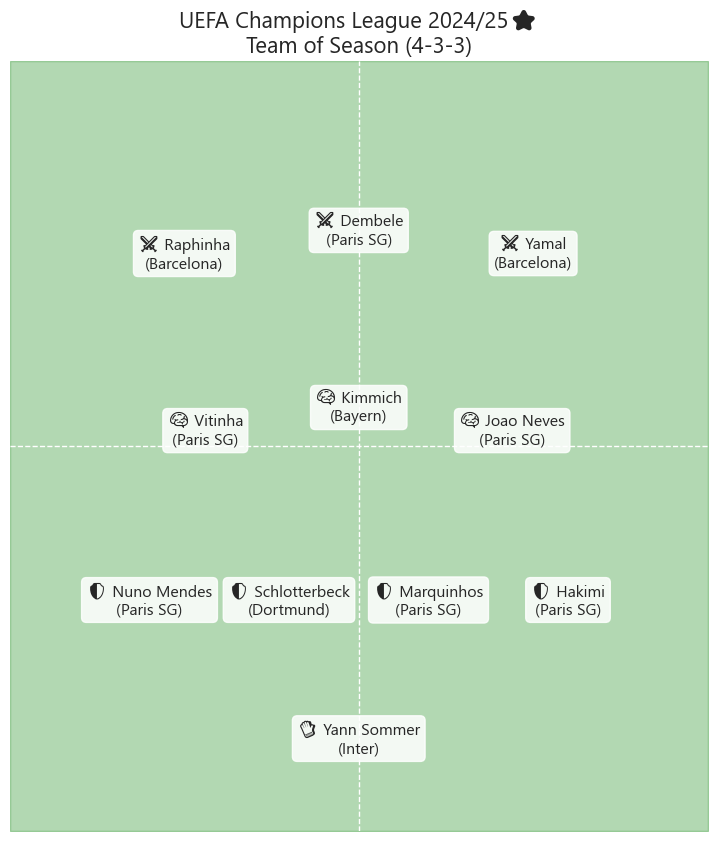

In [100]:
players_with_teams = [
    ("🧤 Yann Sommer\n(Inter)", (5, 1.2)),

    ("🛡 Nuno Mendes\n(Paris SG)", (2, 3)),
    ("🛡 Schlotterbeck\n(Dortmund)", (4, 3)),
    ("🛡 Marquinhos\n(Paris SG)", (6, 3)),
    ("🛡 Hakimi\n(Paris SG)", (8, 3)),

    ("🧠 Vitinha\n(Paris SG)", (2.8, 5.2)),
    ("🧠 Kimmich\n(Bayern)", (5, 5.5)),
    ("🧠 Joao Neves\n(Paris SG)", (7.2, 5.2)),

    ("⚔ Raphinha\n(Barcelona)", (2.5, 7.5)),
    ("⚔ Dembele\n(Paris SG)", (5, 7.8)),
    ("⚔ Yamal\n(Barcelona)", (7.5, 7.5)),
]

# Krijimi i figurës
fig, ax = plt.subplots(figsize=(9, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Fusha dhe vijat ndarëse
plt.fill_between([0, 10], 0, 10, color='green', alpha=0.3)
plt.plot([0, 10], [5, 5], color='white', linestyle='--', linewidth=1)
plt.plot([5, 5], [0, 10], color='white', linestyle='--', linewidth=1)

# Vendosja e lojtarëve me emër + skuadër
for name, (x, y) in players_with_teams:
    ax.text(x, y, name, ha='center', va='center', fontsize=11.5, bbox=dict(facecolor='white', alpha=0.85, boxstyle='round'))

plt.title('UEFA Champions League 2024/25⭐\nTeam of Season (4-3-3)', fontsize=16)
plt.show()

Text(0.5, 1.0, 'UEFA Champions League 2024/25\nTeam of the Season (4-3-3)')

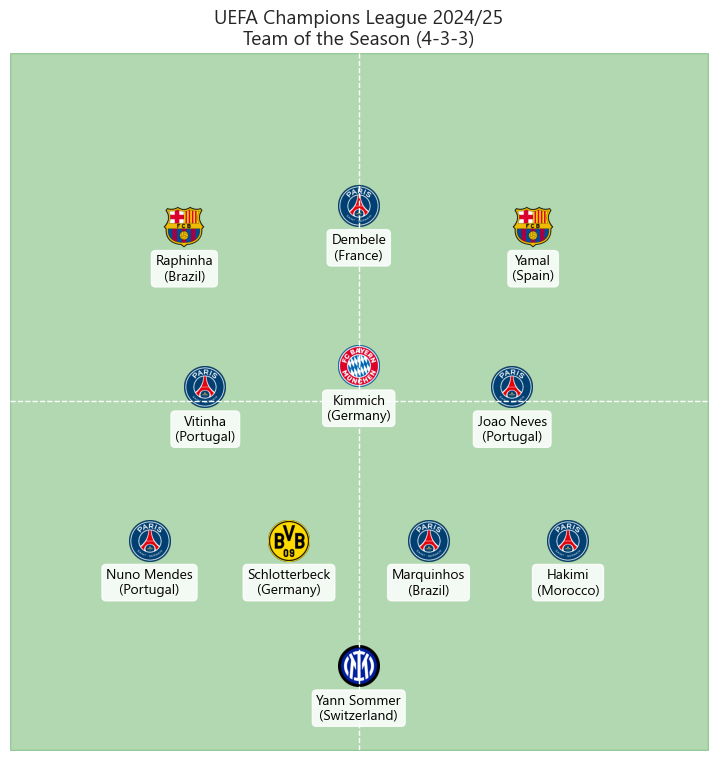

In [148]:
players_data = [
    ("Yann Sommer\n(Switzerland)", "Inter", (5, 1.2), "Inter200px.svg.png"),

    ("Nuno Mendes\n(Portugal)", "PSG", (2, 3), "Paris200px.svg.png"),
    ("Schlotterbeck\n(Germany)", "Dortmund", (4, 3), "Borussia200px.svg.png"),
    ("Marquinhos\n(Brazil)", "PSG", (6, 3), "Paris200px.svg.png"),
    ("Hakimi\n(Morocco)", "PSG", (8, 3), "Paris200px.svg.png"),

    ("Vitinha\n(Portugal)", "PSG", (2.8, 5.2), "Paris200px.svg.png"),
    ("Kimmich\n(Germany)", "Bayern", (5, 5.5), "BayernMunchen200px.svg.png"),
    ("Joao Neves\n(Portugal)", "PSG", (7.2, 5.2), "Paris200px.svg.png"),

    ("Raphinha\n(Brazil)", "Barcelona", (2.5, 7.5), "FC_Barcelona200px.svg.png"),
    ("Dembele\n(France)", "PSG", (5, 7.8), "Paris200px.svg.png"),
    ("Yamal\n(Spain)", "Barcelona", (7.5, 7.5), "FC_Barcelona200px.svg.png"),
]

# Krijimi i figurës për formacionin
fig, ax = plt.subplots(figsize=(9, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Fusha dhe vijat ndarëse
plt.fill_between([0, 10], 0, 10, color='green', alpha=0.3)
plt.plot([0, 10], [5, 5], color='white', linestyle='--', linewidth=1)
plt.plot([5, 5], [0, 10], color='white', linestyle='--', linewidth=1)

# Vendosja e logove dhe emrave të lojtarëve
for name, team, (x, y), logo_file in players_data:
    logo_path = f"TeamLogos/{logo_file}"  # kjo është rruga e saktë për ty

    try:
        logo = mpimg.imread(logo_path)
        ax.imshow(logo, extent=(x - 0.30, x + 0.30, y - 0.30, y + 0.30), zorder=1)
    except FileNotFoundError:
        ax.text(x, y, team, ha='center', va='center', fontsize=10, color='white', bbox=dict(facecolor='red', alpha=0.6))

    ax.text(x, y - 0.6, name, ha='center', va='center', fontsize=10,
            color='black', bbox=dict(facecolor='white', alpha=0.85, boxstyle='round'), zorder=2)

# Titulli
plt.title('UEFA Champions League 2024/25\nTeam of the Season (4-3-3)', fontsize=14)
